<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
from datetime import datetime

In [169]:
%%capture
import sys

if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

In [170]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [171]:
#load datasets
a = pd.read_csv('https://docs.google.com/spreadsheets/d/1cCFkJqgf1RaaIQ1xj-WFF5551DyZbuomGrVQZXuiPOo/gviz/tq?tqx=out:csv')
b = pd.read_csv('https://docs.google.com/spreadsheets/d/1P2ReMoAxe0R1bWubm-j87sYQtX_ORYfFWcLrKk5NjXs/gviz/tq?tqx=out:csv')
c = pd.read_csv('https://docs.google.com/spreadsheets/d/1pWP-J8Y4oIgCTeaKO6KO-XPobhLhUuFpPqt-uMTFhJs/gviz/tq?tqx=out:csv')
d = pd.read_csv('https://docs.google.com/spreadsheets/d/1N2Qp110ijw0QfeaGkqz4LgSCoi_fap-2b8TZ1UOPsKY/gviz/tq?tqx=out:csv')
e = pd.read_csv('https://docs.google.com/spreadsheets/d/1_4fRlOznzllkX03lZWOV7oCDA2XuVlBM7SmeGWg854I/gviz/tq?tqx=out:csv')

f = pd.read_csv('https://docs.google.com/spreadsheets/d/1IvjLeAlFZmIYz4vi-gYOLISxoNCKf8HEAW28tqOZBIA/gviz/tq?tqx=out:csv')
g = pd.read_csv('https://docs.google.com/spreadsheets/d/1Eb5bn_c3CnO_ySI23ftu04SuJOEb0r-aaQr-cn8VJoo/gviz/tq?tqx=out:csv')
h = pd.read_csv('https://docs.google.com/spreadsheets/d/1WnLPeMLBYpu2Hg0Cr7IggWNJkpAWYUjPNOAwpexWf-I/gviz/tq?tqx=out:csv')
i = pd.read_csv('https://docs.google.com/spreadsheets/d/1_l71V2avlNb7vWg-JwmqT8zU0SkGpuNHJx_X_AWXwFs/gviz/tq?tqx=out:csv')
j = pd.read_csv('https://docs.google.com/spreadsheets/d/165W0rSl-dwmPWyCD6VWEWod6LMcZHfhU7oWI4ct78PA/gviz/tq?tqx=out:csv')

In [172]:
#Join all datasets

a['Season'] = '2014'
b['Season'] = '2015'
c['Season'] = '2016'
d['Season'] = '2017'
e['Season'] = '2018'

a['Dates'] = pd.to_datetime(a['date_GMT'])
a['Dates'] = a['Dates'].dt.date
b['Dates'] = pd.to_datetime(b['date_GMT'])
b['Dates'] = b['Dates'].dt.date
c['Dates'] = pd.to_datetime(c['date_GMT'])
c['Dates'] = c['Dates'].dt.date
d['Dates'] = pd.to_datetime(d['date_GMT'])
d['Dates'] = d['Dates'].dt.date
e['Dates'] = pd.to_datetime(e['date_GMT'])
e['Dates'] = e['Dates'].dt.date

x = pd.concat([a,b,c,d,e], ignore_index=True)
y = pd.concat([f,g,h,i,j], ignore_index=True)



In [173]:
#Wrangle

y['HomeTeam'] = y['HomeTeam'].replace('Tottenham', 'Tottenham Hotspur')
y['AwayTeam'] = y['AwayTeam'].replace('Tottenham', 'Tottenham Hotspur')
y['HomeTeam'] = y['HomeTeam'].replace('Man United', 'Manchester United')
y['AwayTeam'] = y['AwayTeam'].replace('Man United', 'Manchester United')
y['HomeTeam'] = y['HomeTeam'].replace('Man City', 'Manchester City')
y['AwayTeam'] = y['AwayTeam'].replace('Man City', 'Manchester City')
y['HomeTeam'] = y['HomeTeam'].replace('West Ham', 'West Ham United')
y['AwayTeam'] = y['AwayTeam'].replace('West Ham', 'West Ham United')
y['HomeTeam'] = y['HomeTeam'].replace('Leicester', 'Leicester City')
y['AwayTeam'] = y['AwayTeam'].replace('Leicester', 'Leicester City')
y['HomeTeam'] = y['HomeTeam'].replace('Newcastle', 'Newcastle United')
y['AwayTeam'] = y['AwayTeam'].replace('Newcastle', 'Newcastle United')
y['HomeTeam'] = y['HomeTeam'].replace('West Brom', 'West Bromwich Albion')
y['AwayTeam'] = y['AwayTeam'].replace('West Brom', 'West Bromwich Albion')
y['HomeTeam'] = y['HomeTeam'].replace('Bournemouth', 'AFC Bournemouth')
y['AwayTeam'] = y['AwayTeam'].replace('Bournemouth', 'AFC Bournemouth')
y['HomeTeam'] = y['HomeTeam'].replace('Swansea', 'Swansea City')
y['AwayTeam'] = y['AwayTeam'].replace('Swansea', 'Swansea City')
y['HomeTeam'] = y['HomeTeam'].replace('Brighton', 'Brighton & Hove Albion')
y['AwayTeam'] = y['AwayTeam'].replace('Brighton', 'Brighton & Hove Albion')
y['HomeTeam'] = y['HomeTeam'].replace('Hull', 'Hull City')
y['AwayTeam'] = y['AwayTeam'].replace('Hull', 'Hull City')
y['HomeTeam'] = y['HomeTeam'].replace('Huddersfield', 'Huddersfield Town')
y['AwayTeam'] = y['AwayTeam'].replace('Huddersfield', 'Huddersfield Town')
y['HomeTeam'] = y['HomeTeam'].replace('QPR', 'Queens Park Rangers')
y['AwayTeam'] = y['AwayTeam'].replace('QPR', 'Queens Park Rangers')
y['HomeTeam'] = y['HomeTeam'].replace('Wolves', 'Wolverhampton Wanderers')
y['AwayTeam'] = y['AwayTeam'].replace('Wolves', 'Wolverhampton Wanderers')
y['HomeTeam'] = y['HomeTeam'].replace('Cardiff', 'Cardiff City')
y['AwayTeam'] = y['AwayTeam'].replace('Cardiff', 'Cardiff City')
y['HomeTeam'] = y['HomeTeam'].replace('Norwich', 'Norwich City')
y['AwayTeam'] = y['AwayTeam'].replace('Norwich', 'Norwich City')
y['HomeTeam'] = y['HomeTeam'].replace('Stoke', 'Stoke City')
y['AwayTeam'] = y['AwayTeam'].replace('Stoke', 'Stoke City')

y['Date'] = pd.to_datetime(y['Date'])
y['Date'] = y['Date'].dt.date

x.rename(columns={'home_team_goal_count':'FTHG', 'away_team_goal_count_half_time':'HTAG', 'away_team_goal_count':'FTAG', 'home_team_goal_count_half_time':'HTHG', 'home_team_name':'HomeTeam', 'away_team_name':'AwayTeam', 'away_team_corner_count':'AC', 'home_team_corner_count':'HC', 'home_team_yellow_cards':'HY', 'away_team_yellow_cards':'AY'}, inplace=True)
y.rename(columns={'BbAv>2.5':'BbAvO2.5', 'BbAv<2.5':'BbAvU2.5'}, inplace=True)
y['date']=y['Date']

#select features from each dataframe
y = y[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HC', 'AC', 'HY', 'AY', 'HTHG', 'HTAG', 'Referee', 'BbAvH', 'BbAvD', 'BbAvA', 'BbAvO2.5', 'BbAvU2.5']]
x = x[['Dates', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'AC', 'HC', 'HY', 'AY', 'HTHG', 'HTAG', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'total_goal_count', 'average_goals_per_match_pre_match', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'stadium_name' ]]
y = y.dropna()

#create year column
x['Year'] = pd.to_datetime(x['Dates']).dt.to_period('Y')
y['Year'] = pd.to_datetime(y['Date']).dt.to_period('Y')

#convert floats to int
y['FTHG'] = y['FTHG'].astype(int)
y['FTAG'] = y['FTAG'].astype(int)
y['HC'] = y['HC'].astype(int)
y['AC'] = y['AC'].astype(int)
y['HY'] = y['HY'].astype(int)
y['AY'] = y['AY'].astype(int)
y['HTHG'] = y['HTHG'].astype(int)
y['HTAG'] = y['HTAG'].astype(int)

#merge x any y dataframes
df = pd.merge(x, y, on=['Year', 'AwayTeam', 'HomeTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG'])
df = df.drop(df.index[[705,707,1115,1117,664,666,1428,1430,720,722,1061,1063]])
df = df.reset_index(drop=True)

#final feature selection
df = df[['Season', 'HomeTeam', 'AwayTeam', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'total_goal_count', 'average_goals_per_match_pre_match', 'average_corners_per_match_pre_match', 'stadium_name', 'Referee', 'BbAvH', 'BbAvA', 'BbAvO2.5', 'BbAvU2.5']]
df['OU25']= [1 if x > 2.5 else 0 for x in df['total_goal_count']]

In [174]:
df.head()

,Season,HomeTeam,AwayTeam,Pre-Match PPG (Home),Pre-Match PPG (Away),total_goal_count,average_goals_per_match_pre_match,average_corners_per_match_pre_match,stadium_name,Referee,BbAvH,BbAvA,BbAvO2.5,BbAvU2.5,OU25
0,2014,Manchester United,Swansea City,0.0,0.0,3,0.0,0.0,Old Trafford,M Dean,1.34,9.32,1.71,2.13,1
1,2014,Leicester City,Everton,0.0,0.0,4,0.0,0.0,King Power Stadium,M Jones,3.06,2.36,2.00,1.80,1
2,2014,Stoke City,Aston Villa,0.0,0.0,1,0.0,0.0,Bet365 Stadium,A Taylor,1.92,4.27,2.31,1.60,0
3,2014,West Bromwich Albion,Sunderland,0.0,0.0,4,0.0,0.0,The Hawthorns (West Bromwich),N Swarbrick,2.23,3.34,2.14,1.70,1
4,2014,West Ham United,Tottenham Hotspur,0.0,0.0,1,0.0,0.0,Boleyn Ground (London),C Foy,3.74,2.03,1.98,1.82,0


In [175]:
df1=df.drop(['total_goal_count'], axis=1)

In [176]:
!pip install category_encoders==2.*

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [178]:
#Split train and test datasets

X = df1
X_train = df1.query('Season == "2014" | Season=="2015" | Season=="2016"')
X_val = df1.query('Season == "2017"')
X_test = df1.query('Season=="2018"')
y_train = X_train.pop('OU25')
y_val = X_val.pop('OU25')
y_test = X_test.pop('OU25')

In [179]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1140, 13)
(380, 13)
(380, 13)
(1140,)
(380,)
(380,)


In [180]:
# Baseline
y_train.value_counts(normalize=True)

1    0.518421
0    0.481579
Name: OU25, dtype: float64

In [181]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [182]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [183]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0321 ± 0.0356,BbAvO2.5
0.0100 ± 0.0297,Pre-Match PPG (Home)
0.0079 ± 0.0448,BbAvA
0.0047 ± 0.0227,BbAvH
0 ± 0.0000,Season
-0.0011 ± 0.0227,Pre-Match PPG (Away)
-0.0084 ± 0.0289,AwayTeam
-0.0126 ± 0.0158,BbAvU2.5
-0.0153 ± 0.0279,average_corners_per_match_pre_match
-0.0153 ± 0.0154,HomeTeam


In [184]:
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Season', 'HomeTeam', 'AwayTeam',
                                      'stadium_name', 'Referee'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Season',
                                          'data_type': dtype('O'),
                                          'mapping': 2014    1
2015    2
2016    3
NaN    -2
dtype: int64},
                                         {'col': 'HomeTeam',
                                          'data_type': dtype('O'),
                                          'mapping': Manchester United        1...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
          

In [185]:
print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.6491228070175439
Validation Accuracy: 0.531578947368421
Test Accuracy: 0.5421052631578948


In [186]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5289473684210526
test accuracy: 0.5631578947368421


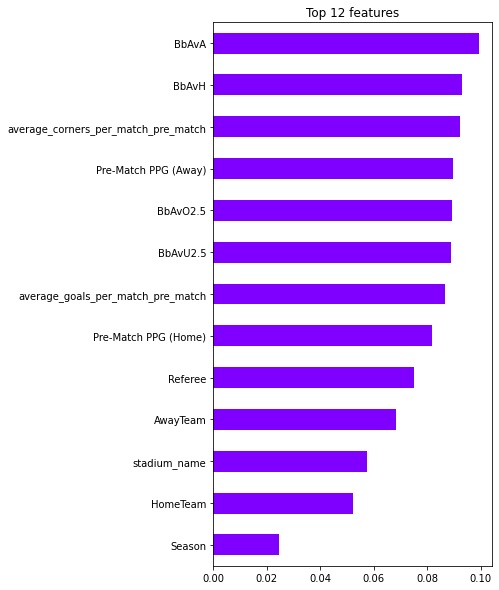

In [187]:
# Get feature importances
rf = model2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 12
plt.figure(figsize=(5,10))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [188]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=300, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.5850877192982457
Validation Accuracy: 0.5657894736842105
Test Accuracy: 0.5394736842105263


In [189]:
#remove negative features


In [190]:
X_train = X_train[['average_corners_per_match_pre_match', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'BbAvH', 'BbAvA', 'BbAvO2.5']]
X_val = X_val[['average_corners_per_match_pre_match', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'BbAvH', 'BbAvA', 'BbAvO2.5']]
X_test = X_test[['average_corners_per_match_pre_match', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'BbAvH', 'BbAvA', 'BbAvO2.5']]

In [191]:


from xgboost import XGBClassifier

In [192]:
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.6289473684210526
Validation Accuracy: 0.5842105263157895
Test Accuracy: 0.6026315789473684


In [193]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5421052631578948
test accuracy: 0.5184210526315789


In [194]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [195]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [196]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0642 ± 0.0406,BbAvO2.5
0.0279 ± 0.0244,BbAvH
0.0174 ± 0.0340,BbAvA
-0.0011 ± 0.0304,average_corners_per_match_pre_match
-0.0016 ± 0.0270,Pre-Match PPG (Home)
-0.0042 ± 0.0380,Pre-Match PPG (Away)


In [197]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.5763157894736842
Validation Accuracy: 0.5815789473684211
Test Accuracy: 0.5684210526315789


In [198]:
import matplotlib.pyplot as plt


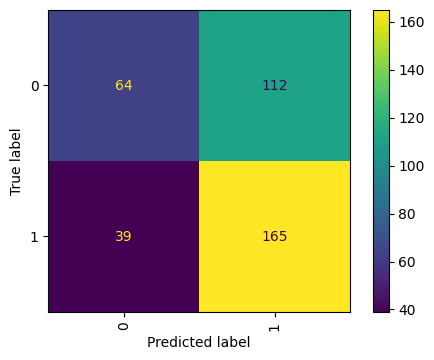

In [199]:
#Confusion graph
from sklearn.metrics import plot_confusion_matrix, classification_report

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [200]:
df1.head()

,Season,HomeTeam,AwayTeam,Pre-Match PPG (Home),Pre-Match PPG (Away),average_goals_per_match_pre_match,average_corners_per_match_pre_match,stadium_name,Referee,BbAvH,BbAvA,BbAvO2.5,BbAvU2.5,OU25
0,2014,Manchester United,Swansea City,0.0,0.0,0.0,0.0,Old Trafford,M Dean,1.34,9.32,1.71,2.13,1
1,2014,Leicester City,Everton,0.0,0.0,0.0,0.0,King Power Stadium,M Jones,3.06,2.36,2.00,1.80,1
2,2014,Stoke City,Aston Villa,0.0,0.0,0.0,0.0,Bet365 Stadium,A Taylor,1.92,4.27,2.31,1.60,0
3,2014,West Bromwich Albion,Sunderland,0.0,0.0,0.0,0.0,The Hawthorns (West Bromwich),N Swarbrick,2.23,3.34,2.14,1.70,1
4,2014,West Ham United,Tottenham Hotspur,0.0,0.0,0.0,0.0,Boleyn Ground (London),C Foy,3.74,2.03,1.98,1.82,0


In [201]:
final = df[['Season', 'HomeTeam', 'AwayTeam', 'BbAvO2.5', 'BbAvU2.5', 'total_goal_count', 'OU25']]
final = final.query('Season == "2018"')

In [202]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1' ])

final.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

fin = pd.concat([final, prob, pred], axis=1)


In [203]:
fin['Correct'] = (fin['OU25'] == fin['pred']).astype(int)


In [204]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [205]:
#betting on every single match
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'Correct'] == 1:
    if fin.loc[i,'OU25'] == 1:
      count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
      money.append(count)
    elif fin.loc[i, 'OU25'] == 0:
      count = (count + (100*fin.loc[i, 'BbAvU2.5'])-100)
      money.append(count)
  else:
    count = count - 100
    money.append(count)
    
fin.loc[:, 'Model1'] = pd.Series(money)

In [206]:
#betting on every over (baseline)
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'OU25'] == 1:
      count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
      money.append(count)
  else:
    count = count - 100
    money.append(count)
    
fin.loc[:, 'Baseline'] = pd.Series(money)

In [207]:
fin['OU25'].value_counts(normalize=True)

1    0.536842
0    0.463158
Name: OU25, dtype: float64

In [208]:
fin

,Season,HomeTeam,AwayTeam,BbAvO2.5,BbAvU2.5,total_goal_count,OU25,prob0,prob1,pred,Correct,Model1,Baseline
0,2018,Crystal Palace,Tottenham Hotspur,1.73,2.11,1,0,0.411910,0.588090,1,0,-100.0,-100.0
1,2018,Manchester United,Leicester City,2.03,1.79,3,1,0.478359,0.521641,1,1,3.0,3.0
2,2018,Newcastle United,Tottenham Hotspur,2.01,1.81,3,1,0.447154,0.552846,1,1,104.0,104.0
3,2018,AFC Bournemouth,Cardiff City,1.98,1.83,2,0,0.503704,0.496296,0,1,187.0,4.0
4,2018,Watford,Brighton & Hove Albion,2.35,1.59,2,0,0.539876,0.460124,0,1,246.0,-96.0
5,2018,Fulham,Crystal Palace,1.95,1.87,2,0,0.512624,0.487376,0,1,333.0,-196.0
6,2018,Huddersfield Town,Chelsea,1.98,1.84,3,1,0.447154,0.552846,1,1,431.0,-98.0
7,2018,Wolverhampton Wanderers,Everton,2.09,1.75,4,1,0.500757,0.499243,0,0,331.0,11.0
8,2018,Southampton,Burnley,2.34,1.60,0,0,0.518243,0.481757,0,1,391.0,-89.0
9,2018,Liverpool,West Ham United,1.44,2.72,4,1,0.375034,0.624966,1,1,435.0,-45.0


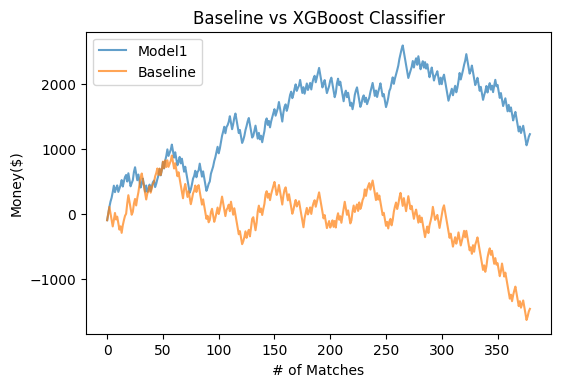

In [209]:
fin.plot(y=["Model1", "Baseline"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [210]:
#betting on only 55% Confidence 
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= 0.55 or fin.loc[i, 'prob1'] >= 0.55:
    if fin.loc[i, 'Correct'] == 1:
      if fin.loc[i,'OU25'] == 1:
        count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
        money.append(count)
      elif fin.loc[i, 'OU25'] == 0:
        count = (count + (100*fin.loc[i, 'BbAvU2.5'])-100)
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'MONEY0.55'] = pd.Series(money)

In [211]:
#betting on only 60% Confidence 
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= 0.6 or fin.loc[i, 'prob1'] >= 0.6:
    if fin.loc[i, 'Correct'] == 1:
      if fin.loc[i,'OU25'] == 1:
        count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
        money.append(count)
      elif fin.loc[i, 'OU25'] == 0:
        count = (count + (100*fin.loc[i, 'BbAvU2.5'])-100)
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'MONEY0.6'] = pd.Series(money)

In [212]:
#betting on only 65% Confidence 
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= 0.65 or fin.loc[i, 'prob1'] >= 0.65:
    if fin.loc[i, 'Correct'] == 1:
      if fin.loc[i,'OU25'] == 1:
        count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
        money.append(count)
      elif fin.loc[i, 'OU25'] == 0:
        count = (count + (100*fin.loc[i, 'BbAvU2.5'])-100)
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'MONEY0.65'] = pd.Series(money)

In [213]:
#betting on only 52% Confidence 
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= 0.52 or fin.loc[i, 'prob1'] >= 0.52:
    if fin.loc[i, 'Correct'] == 1:
      if fin.loc[i,'OU25'] == 1:
        count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
        money.append(count)
      elif fin.loc[i, 'OU25'] == 0:
        count = (count + (100*fin.loc[i, 'BbAvU2.5'])-100)
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'MONEY0.52'] = pd.Series(money)

In [214]:
#betting on only 53% Confidence 
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= 0.53 or fin.loc[i, 'prob1'] >= 0.53:
    if fin.loc[i, 'Correct'] == 1:
      if fin.loc[i,'OU25'] == 1:
        count = (count + (100*fin.loc[i, 'BbAvO2.5'])-100)
        money.append(count)
      elif fin.loc[i, 'OU25'] == 0:
        count = (count + (100*fin.loc[i, 'BbAvU2.5'])-100)
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'MONEY0.53'] = pd.Series(money)

In [215]:
fin.tail()

,Season,HomeTeam,AwayTeam,BbAvO2.5,BbAvU2.5,total_goal_count,OU25,prob0,prob1,pred,Correct,Model1,Baseline,MONEY0.55,MONEY0.6,MONEY0.65,MONEY0.52,MONEY0.53
375,2018,Manchester United,Cardiff City,1.39,2.95,2,0,0.406826,0.593174,1,0,1151.0,-1533.0,-987.0,-184.0,173.0,-252.0,-969.0
376,2018,Liverpool,Wolverhampton Wanderers,1.61,2.31,2,0,0.441904,0.558096,1,0,1051.0,-1633.0,-1087.0,-184.0,173.0,-352.0,-1069.0
377,2018,Watford,West Ham United,1.55,2.44,5,1,0.484892,0.515108,1,1,1106.0,-1578.0,-1087.0,-184.0,173.0,-352.0,-1069.0
378,2018,Fulham,Newcastle United,1.75,2.08,4,1,0.473805,0.526195,1,1,1181.0,-1503.0,-1087.0,-184.0,173.0,-277.0,-1069.0
379,2018,Brighton & Hove Albion,Manchester City,1.41,2.86,5,1,0.406706,0.593294,1,1,1222.0,-1462.0,-1046.0,-184.0,173.0,-236.0,-1028.0


In [216]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.8s finished


In [217]:
print('Cross-validation Best Score', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model', search.best_estimator_)

Cross-validation Best Score 0.5482456140350876
Best Estimator: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__criterion': 'gini'}
Best Model Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_me...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     